# Artificial Intelligence I: Introduction to Data Science and Machine Learning
# Chapter 3: Introduction to Scikit Learn

### Veri Kümesi

2015-2016 NHANES (Ulusal Sağlık ve Beslenme Araştırması) anketine dayalı bir veri kümesi kullanıyoruz. Bu veri kümesi, Kaggle platformundan temin edilmiştir. Amacımız, farklı yaş ve cinsiyet gruplarındaki Beden Kitle İndeksi (BMI) verilerini toplamak ve karşılaştırmak için tanımlayıcı ve tanısal analizler yapmaktır.

Veri seti toplamda 28 sütun ve 5735 satırdan oluşmaktadır. Analiz için belirli önemli sütunları seçtik.

kaynak: https://www.kaggle.com/datasets/ramendrapandey/nhanes-2015-2016

Sütunların kısa açıklamaları:

- SEQN: Yanıtlayıcı sıra numarası
- SMQ020: Sigara içme durumu
- RIAGENDR: Cinsiyet
- RIDAGEYR: Yaş (yıl)
- DMDEDUC2: Eğitim seviyesi
- BMXWT: Ağırlık (kg)
- BMXHT: Boy (cm)
- BMXBMI: Beden Kitle İndeksi (BMI)

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

file="nhanes.csv"
df=pd.read_csv(file)

In [2]:
# Sütun seçimi
isolated_df= df.loc[:,('SMQ020', 'RIAGENDR', 'RIDAGEYR','DMDEDUC2','BMXWT', 'BMXHT', 'BMXBMI')]
isolated_df.head()

,SMQ020,RIAGENDR,RIDAGEYR,DMDEDUC2,BMXWT,BMXHT,BMXBMI
0,1,1,62,5.0,94.8,184.5,27.8
1,1,1,53,3.0,90.4,171.4,30.8
2,1,1,78,3.0,83.4,170.1,28.8
3,2,2,56,5.0,109.8,160.9,42.4
4,2,2,42,4.0,55.2,164.9,20.3


In [3]:
#isolated_df.columns = ['smoking','gender', 'age','education','weight','height','bmi']
isolated_df = isolated_df.rename(columns={
    'SMQ020': 'smoking',
    'RIAGENDR': 'gender',
    'RIDAGEYR': 'age',
    'DMDEDUC2': 'education',
    'BMXWT': 'weight',
    'BMXHT': 'height',
    'BMXBMI': 'bmi'
})

isolated_df.head()

,smoking,gender,age,education,weight,height,bmi
0,1,1,62,5.0,94.8,184.5,27.8
1,1,1,53,3.0,90.4,171.4,30.8
2,1,1,78,3.0,83.4,170.1,28.8
3,2,2,56,5.0,109.8,160.9,42.4
4,2,2,42,4.0,55.2,164.9,20.3


In [4]:
isolated_df.isnull().sum() # boş veya eksik değerlerin sayını göster

smoking        0
gender         0
age            0
education    261
weight        69
height        62
bmi           73
dtype: int64

In [5]:
# Boş veya eksik değerleri dolduruyoruz
isolated_df['education'].fillna(isolated_df['education'].median(), inplace=True) 
isolated_df['weight'].fillna(isolated_df['weight'].mean(), inplace=True)
isolated_df['height'].fillna(isolated_df['height'].mean(), inplace=True)
isolated_df['bmi'].fillna(isolated_df['bmi'].mean(), inplace=True)

In [6]:
isolated_df.isnull().sum()

smoking      0
gender       0
age          0
education    0
weight       0
height       0
bmi          0
dtype: int64

In [7]:
# Sütunun tüm değerlerini gösterir
print(isolated_df.smoking.unique())

[1 2 7 9]


In [8]:
isolated_df.smoking.isin([7, 9])

0       False
1       False
2       False
3       False
4       False
        ...  
5730    False
5731    False
5732    False
5733    False
5734    False
Name: smoking, Length: 5735, dtype: bool

In [9]:
isolated_df[isolated_df.smoking.isin([7, 9])]

,smoking,gender,age,education,weight,height,bmi
288,7,1,36,1.0,61.9,173.7,20.5
1331,9,1,80,9.0,79.1,164.8,29.1
1433,9,2,73,5.0,102.0,168.7,35.8
1636,7,1,64,4.0,118.4,172.9,39.6
1756,9,1,80,1.0,97.8,174.2,32.2
2818,9,2,24,3.0,67.1,159.6,26.3
4835,9,2,60,3.0,65.2,156.2,26.7
4964,9,1,80,9.0,97.6,169.6,33.9
5270,9,1,78,2.0,70.7,163.1,26.6
5324,9,2,38,4.0,43.4,146.1,20.3


In [10]:
# 7 veya 9 değerlerine sahip satırların indislerini bulur
drop_indices = isolated_df[isolated_df.smoking.isin([7, 9])].index
drop_indices

Index([288, 1331, 1433, 1636, 1756, 2818, 4835, 4964, 5270, 5324], dtype='int64')

In [11]:
# Belirtilen indislere sahip satırları siler
isolated_df = isolated_df.drop(drop_indices)

In [12]:
print(isolated_df.smoking.unique())

[1 2]


In [13]:
# Sayısal verilerin tanımlayıcı analizi
numerical = ['age','weight','height','bmi']
isolated_df[numerical].describe()

,age,weight,height,bmi
count,5725.00000,5725.000000,5725.000000,5725.000000
mean,48.02917,81.344462,166.145023,29.382690
std,18.41959,21.632842,10.026926,7.052307
min,18.00000,32.400000,129.700000,14.500000
25%,32.00000,66.100000,158.700000,24.400000
50%,48.00000,78.400000,166.142834,28.400000
75%,63.00000,92.600000,173.400000,33.000000
max,80.00000,198.900000,202.700000,67.300000


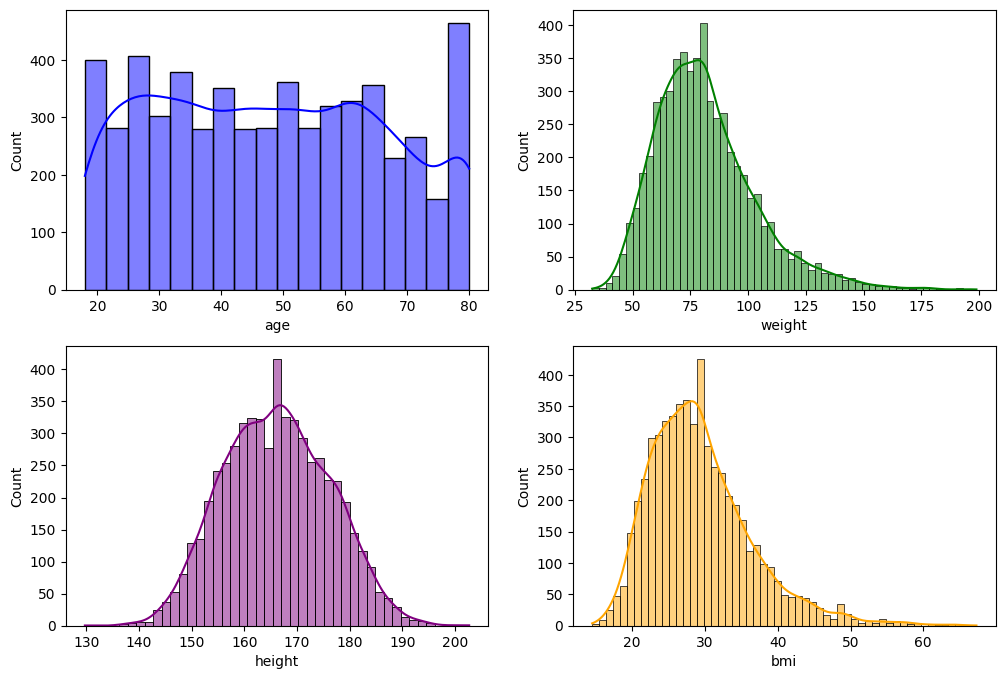

In [14]:
# Sayısal değişken için histogram oluşturma
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
      
sns.histplot(data=isolated_df, x="age", kde=True, color="blue", ax=axs[0,0])  
sns.histplot(data=isolated_df, x="weight", kde=True, color="green", ax=axs[0,1])  
sns.histplot(data=isolated_df, x="height", kde=True, color="purple", ax=axs[1,0])  
sns.histplot(data=isolated_df, x="bmi", kde=True, color="orange", ax=axs[1,1])  

plt.show()

In [15]:
# Boy
qh1, qh2, qh3 = np.percentile(isolated_df['height'], [25,50,75])
iqrh = qh3-qh1
minh = qh1 - 1.5*iqrh
maxh = qh3 + 1.5*iqrh

# IQR içerisinde bulunan verileri seçiyoruz
isolated_df = isolated_df[(isolated_df['height'] > minh) & (isolated_df['height'] < maxh)]

In [16]:
# Kilo
qw1, qw2, qw3 = np.percentile(isolated_df['weight'], [25,50,75])
iqrw = qw3-qw1
maxw = qh3 + 1.5*iqrw

# IQR içindeki veriler (veriler sağa çarpık olduğundan yalnızca maksimum ağırlık değerinin altındaki veriler)
isolated_df = isolated_df[isolated_df['weight'] < maxw]

In [17]:
# BMI
qb1, qb2, qb3 = np.percentile(isolated_df['bmi'], [25,50,75])
iqrb = qb3-qb1
maxb = qb3 + 1.5*iqrb

# IQR içindeki veriler (veriler sağa çarpık olduğundan yalnızca maksimum ağırlık değerinin altındaki veriler)
isolated_df = isolated_df[isolated_df['bmi'] < maxb]

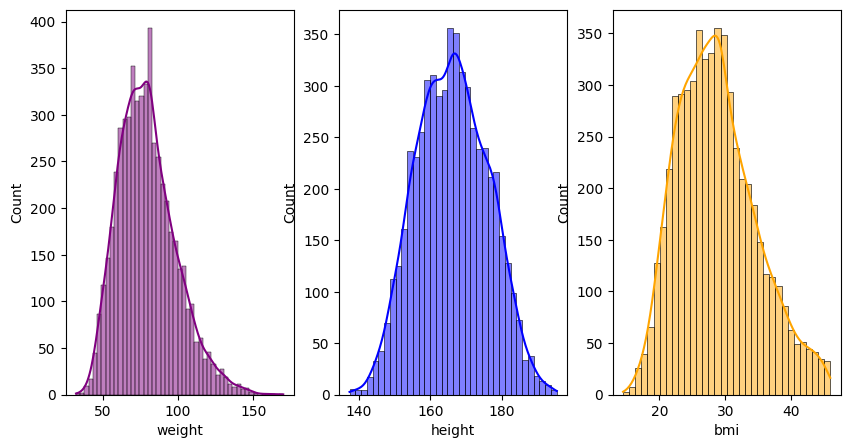

In [18]:
# Histogramı kullanarak aykırı değerleri çıkardıktan sonra dağılımı kontrol edin
fig, axs = plt.subplots(1,3, figsize=(10, 5))
      
sns.histplot(data= isolated_df, x="weight", kde=True, color="purple", ax=axs[0])
sns.histplot(data= isolated_df, x="height", kde=True, color="blue", ax=axs[1])
sns.histplot(data= isolated_df, x="bmi", kde=True, color="orange", ax=axs[2])

plt.show()

## Regresyon Analizi:

- Bağımlı Değişken: BMI (vücut kitle indeksi)
- Bağımsız Değişkenler: Sigara içme durumu, cinsiyet, yaş, eğitim seviyesi, ağırlık ve boy
- Amaç: BMI'yi diğer değişkenlere bağlı olarak tahmin etmek

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

In [20]:
# Bağımsız ve bağımlı değişkenleri belirleyin
X = isolated_df[['smoking', 'gender', 'age', 'education', 'weight', 'height']]
y = isolated_df['bmi']

In [21]:
# Verileri ölçeklendirin
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [22]:
# Veriyi eğitim ve test setlerine ayırın
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [23]:
# Regresyon modelini oluşturun ve eğitin
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [24]:
# Modelin performansını test edin
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

Mean Squared Error: 0.5409217143394596


In [25]:
# Modelin R-kare değerini bulun
r2_score = model.score(X_test, y_test)
print('R-squared:', r2_score)

R-squared: 0.9844164896074399


In [26]:
# Model katsayılarını görüntüleyin
coefficients = pd.DataFrame({'Features': X.columns, 'Coefficient': model.coef_})
print(coefficients)

    Features  Coefficient
0    smoking    -0.011944
1     gender     0.021848
2        age    -0.021733
3  education    -0.031250
4     weight     6.799933
5     height    -3.403321


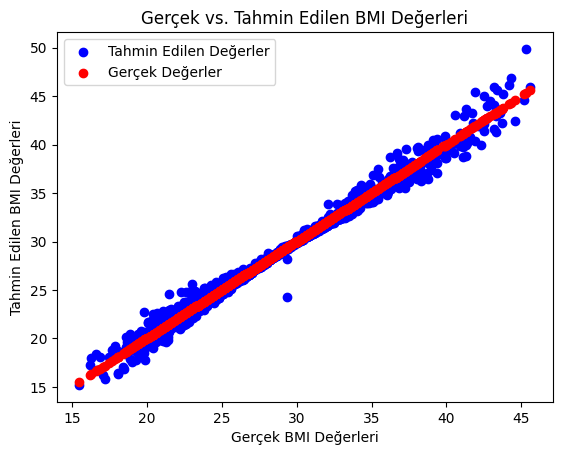

In [27]:
import matplotlib.pyplot as plt

# Gerçek ve tahmin edilen değerleri farklı renklerde gösteren scatter plot
plt.scatter(y_test, y_pred, color='blue', label='Tahmin Edilen Değerler')
plt.scatter(y_test, y_test, color='red', label='Gerçek Değerler')
plt.xlabel('Gerçek BMI Değerleri')
plt.ylabel('Tahmin Edilen BMI Değerleri')
plt.title('Gerçek vs. Tahmin Edilen BMI Değerleri')
plt.legend()
plt.show()

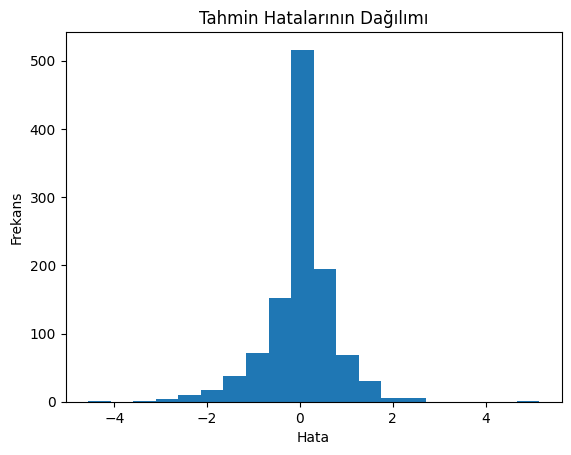

In [28]:
errors = y_test - y_pred
plt.hist(errors, bins=20)
plt.xlabel('Hata')
plt.ylabel('Frekans')
plt.title('Tahmin Hatalarının Dağılımı')
plt.show()

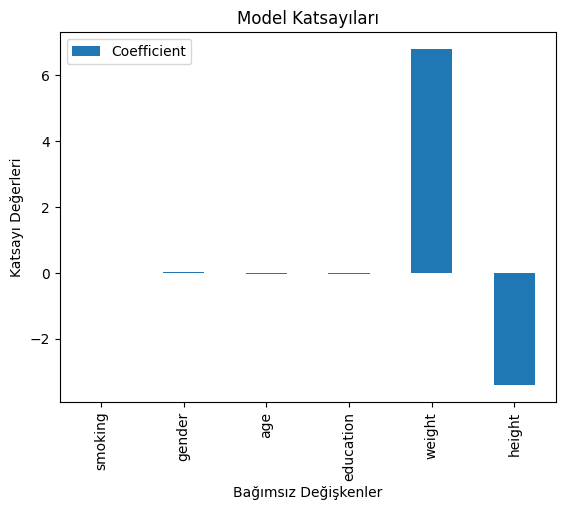

In [29]:
coefficients.plot(x='Features', y='Coefficient', kind='bar')
plt.title('Model Katsayıları')
plt.xlabel('Bağımsız Değişkenler')
plt.ylabel('Katsayı Değerleri')
plt.show()

## Sınıflandırma Analizi:

- Bağımlı Değişken: Sigara içme durumu (0: içmiyor, 1: içiyor)
- Bağımsız Değişkenler: Cinsiyet, yaş, eğitim seviyesi, ağırlık, boy, BMI
- Amaç: Verilen bir bireyin sigara içip içmeyeceğini tahmin etmek

In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

In [31]:
# Bağımsız ve bağımlı değişkenleri belirleyin
X = isolated_df[['gender', 'age', 'education', 'weight', 'height', 'bmi']]
y = isolated_df['smoking']

In [32]:
# Verileri ölçeklendirin
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [33]:
# Veriyi eğitim ve test setlerine ayırın
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [34]:
# Lojistik regresyon modelini oluşturun ve eğitin
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [35]:
# Modelin performansını test edin
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.6618705035971223


In [36]:
# Sınıflandırma raporunu görüntüleyin
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.61      0.45      0.52       448
           2       0.68      0.81      0.74       664

    accuracy                           0.66      1112
   macro avg       0.65      0.63      0.63      1112
weighted avg       0.65      0.66      0.65      1112



In [37]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[201, 247],
       [129, 535]], dtype=int64)

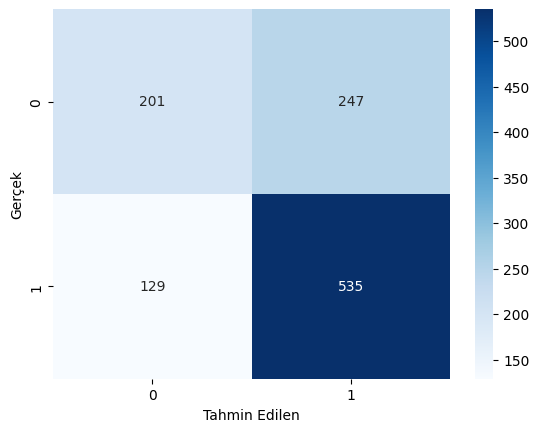

In [38]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Tahmin Edilen')
plt.ylabel('Gerçek')
plt.show()

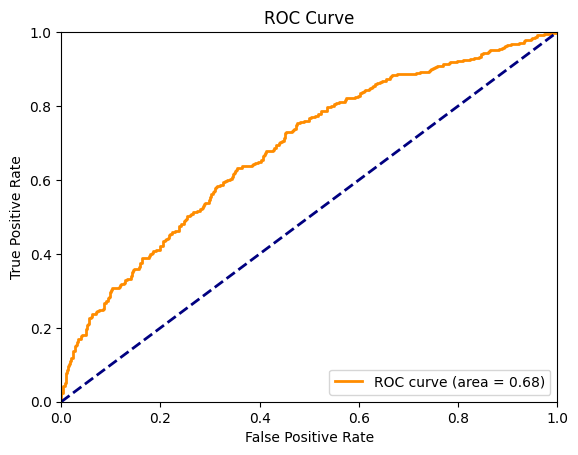

In [39]:
from sklearn.metrics import roc_curve, roc_auc_score

# Bağımlı değişkeni yeniden kodlayın: 1 sigara içen, 0 sigara içmeyen
y_test_binary = y_test.copy()
y_test_binary.replace({1: 0, 2: 1}, inplace=True)

# ROC eğrisi ve AUC hesapla
y_proba = model.predict_proba(X_test)[:,1] # Sınıf olasılıklarını al
fpr, tpr, thresholds = roc_curve(y_test_binary, y_proba)
roc_auc = roc_auc_score(y_test_binary, y_proba)

# ROC eğrisini çiz
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()



## Kümeleme Analizi:

- Amaç: Benzer özelliklere sahip bireyleri gruplara ayırmak
- Bağımsız Değişkenler: Cinsiyet, yaş, eğitim seviyesi, ağırlık, boy, BMI
- Kullanılabilecek Algoritmalar: K-Means Kümeleme, Hiyerarşik Kümeleme vb.

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [41]:
# Bağımsız değişkenleri seçin
X = isolated_df[['smoking','gender', 'age', 'education', 'weight', 'height', 'bmi']]

In [42]:
# Standartlaştırma
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [43]:
# K-Means modelini uygulayın
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_scaled)

KMeans(n_clusters=2, random_state=42)

In [44]:
# Kümeleri tahmin edelim
isolated_df['cluster'] = kmeans.predict(X_scaled)

In [45]:
# Küme merkezlerini ve etiketleri alın
cluster_centers = kmeans.cluster_centers_
labels = kmeans.labels_

In [46]:
# Küme merkezlerini veri setine dönüştürün
cluster_centers = scaler.inverse_transform(cluster_centers)

In [47]:
# Sonuçları görüntüle
print("Küme Merkezleri:")
print(pd.DataFrame(cluster_centers, columns=X.columns))
print("\nKüme Etiketleri:")
print(labels)


Küme Merkezleri:
    smoking    gender        age  education     weight      height        bmi
0  1.711127  1.976483  48.002457   3.469287  72.981691  159.268650  28.743429
1  1.471371  1.028075  48.209457   3.460658  86.585115  173.440735  28.726919

Küme Etiketleri:
[1 1 1 ... 0 1 0]


In [48]:
from sklearn.metrics import silhouette_score

# Silhouette skorunu hesapla
silhouette_avg = silhouette_score(X_scaled, labels)

print("Silhouette Skoru:", silhouette_avg)

Silhouette Skoru: 0.22477062163248943


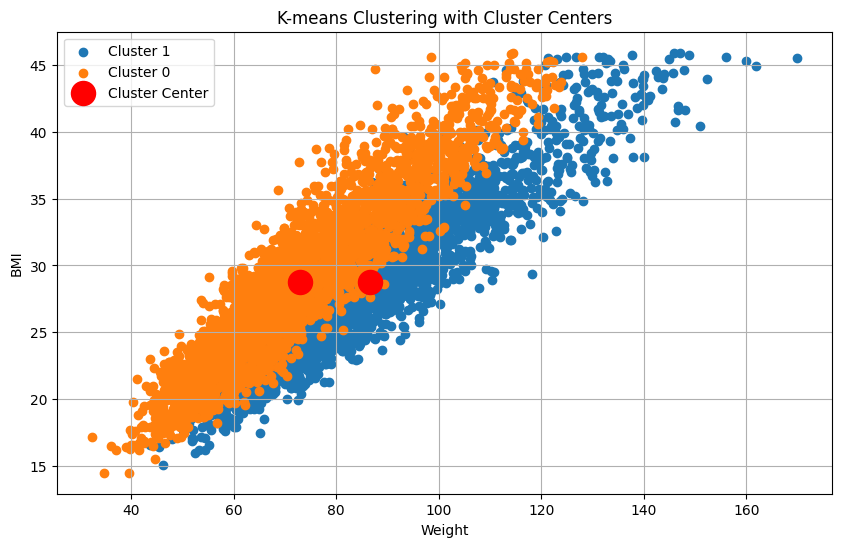

In [49]:
# Sonuçları görselleştirelim
plt.figure(figsize=(10, 6))

for cluster_num in isolated_df['cluster'].unique():
    cluster_data = isolated_df[isolated_df['cluster'] == cluster_num]
    plt.scatter(cluster_data['weight'], cluster_data['bmi'], label=f'Cluster {cluster_num}')

# Küme merkezlerini görselleştirme
plt.scatter(cluster_centers[:, 4], cluster_centers[:, 6], s=300, c='red', marker='o', label='Cluster Center')

plt.title('K-means Clustering with Cluster Centers')
plt.xlabel('Weight')
plt.ylabel('BMI')
plt.legend()
plt.grid(True)
plt.show()


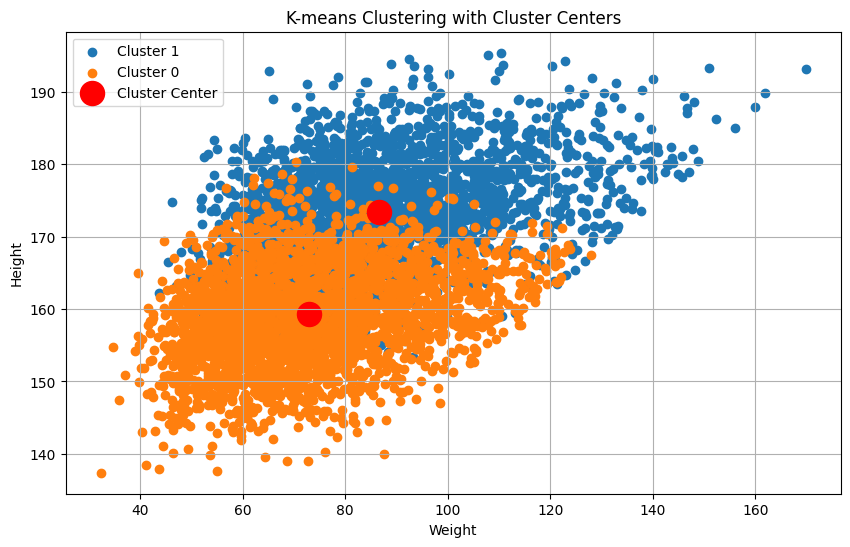

In [50]:
# Sonuçları görselleştirelim
plt.figure(figsize=(10, 6))

for cluster_num in isolated_df['cluster'].unique():
    cluster_data = isolated_df[isolated_df['cluster'] == cluster_num]
    plt.scatter(cluster_data['weight'], cluster_data['height'], label=f'Cluster {cluster_num}')

# Küme merkezlerini görselleştirme
plt.scatter(cluster_centers[:, 4], cluster_centers[:, 5], s=300, c='red', marker='o', label='Cluster Center')

plt.title('K-means Clustering with Cluster Centers')
plt.xlabel('Weight')
plt.ylabel('Height')
plt.legend()
plt.grid(True)
plt.show()
